<a href="https://colab.research.google.com/github/gunjan7858903606/DeepLearning/blob/main/Basics_of_Deep_Learning_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Deep Learning

<img width = 500 src = https://cdn-media-1.freecodecamp.org/images/n1u8onOuWkl5EzzPzBe4n8hOhbTDIDyMBrPM />

## What is deep learning?

Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example.

Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers.



## Current applications of Deep learning

-  Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost.

    <img width = 500 src = https://www.researchgate.net/publication/350153670/figure/fig3/AS:1002737831510019@1616082737583/Object-detection-in-street-Source-5.jpg />


- It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. <img width = 500 src = https://miro.medium.com/max/828/0*YVPtKNIxUKdMf5IB />

- Recommendation Systems

    <img width = 500 src = https://miro.medium.com/max/1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png />

## Neuron in a neural network

<img width = 500 src= https://www.researchgate.net/publication/351372032/figure/fig4/AS:1020744041525248@1620375752492/Comparison-between-biological-neuron-and-artificial-neuron-40.png />

## Plan of Action

1. Architecture of a Neural Network model for regression problem

2. Input shapes and output shapes
  - X: features/data (inputs)
  - y: labels (outputs)

3. Creating custom data to view and fit
4. Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
5. Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
6. Saving a model (so we can use it later)
7. Loading a model


<img width = 500 src = https://victorzhou.com/media/neural-network-post/network3.png />

## 1. Architecture of a Neural Network model for regression problem

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

**Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.12.0


## Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.arange(-7, 15, 3)
X

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [ ]:
y = np.arange(3,25,3)
y

array([ 3,  6,  9, 12, 15, 18, 21, 24])

In [ ]:
y = X + 10

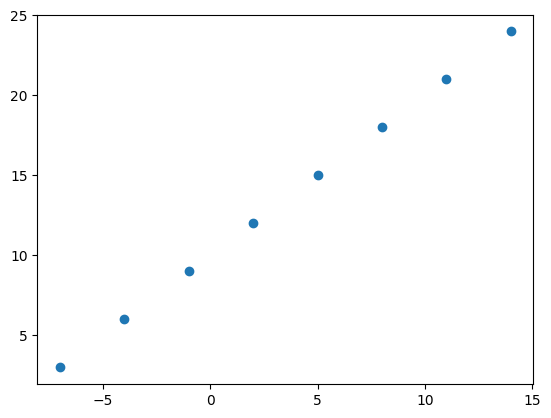

In [ ]:
plt.scatter(x = X, y = y)

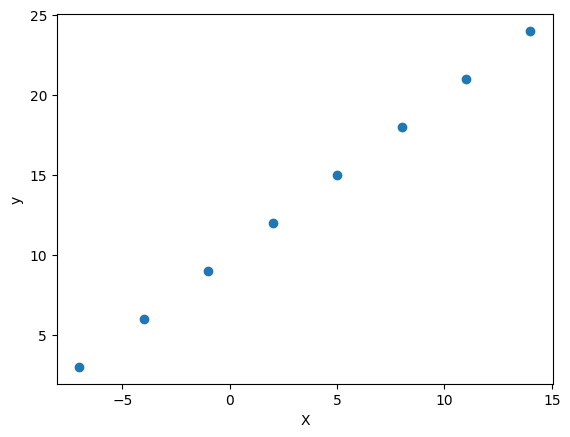

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Now creating X and y using tensorflow

In [ ]:
X = tf.constant(np.arange(-7,15,3))
y = X + 10
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [ ]:
X = tf.Variable([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
X

<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [ ]:
tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

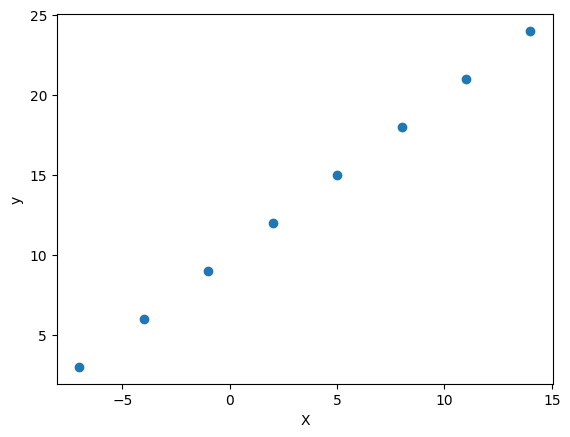

In [ ]:
# Create features (using tensors)
# you can also create it with tf.variable
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

## Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

<img width = 500 src = https://static.packt-cdn.com/products/9781787125933/graphics/B07030_14_01.jpg />

In [ ]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:

# Check the number of dimensions of our vector tensor
vector.ndim

1

In [ ]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

In [ ]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

In [ ]:
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

For example, you might turn a series of images into tensors with shape (32,224, 224, 3), where:

- 224, 224 (the first 2 dimensions) are the height and width of the images in pixels.

- 3 is the number of colour channels of the image (red, green blue).

- 32 is the batch size (the number of images a neural network sees at any one time).

In [ ]:
# Make a tensor of all ones
tensor = tf.ones(shape=(2,3,4,5))
tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]],


       [[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
tensor.ndim

4

In [ ]:
X[0].shape

TensorShape([])

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, 3.0)

There're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape.**


<img width = 700 src= https://i0.wp.com/ajaytech.co/wp-content/uploads/2019/08/neural-network-layers-sequential-1.png />

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
X = tf.constant(np.arange(-7, 15, 3))
y = X + 10

In [ ]:
X

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>

In [ ]:
tf.expand_dims(X, axis = -1)

<tf.Tensor: shape=(8, 1), dtype=int64, numpy=
array([[-7],
       [-4],
       [-1],
       [ 2],
       [ 5],
       [ 8],
       [11],
       [14]])>

In [ ]:
tf.random.set_seed(3)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (1,)),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")

])

model.compile(
    loss = "mae",
    optimizer = "sgd",
     metrics =  ["mse"]
)

result = model.fit(tf.expand_dims(X, axis = -1), y,
          epochs = 10)



Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 17.4671 - mse: 423.9827
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 16.3221 - mse: 362.1956
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - loss: 15.3062 - mse: 311.8313
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 14.3712 - mse: 269.1582
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 13.4770 - mse: 231.6331
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 12.5883 - mse: 197.4918
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 11.6711 - mse: 165.5267
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 10.6903 - mse: 134.9911
Epoch 9/10
1/1 [==============================] - 0s 25ms/step - loss: 9.6062 - mse: 105.6140
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 8.3722 - mse: 77.7444


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 10        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [ ]:
result.history

{'loss': [17.467105865478516,
  16.322093963623047,
  15.30622673034668,
  14.371170043945312,
  13.476993560791016,
  12.588298797607422,
  11.671138763427734,
  10.690260887145996,
  9.606246948242188,
  8.37217903137207],
 'mse': [423.98272705078125,
  362.195556640625,
  311.8312683105469,
  269.1582336425781,
  231.6331024169922,
  197.49176025390625,
  165.5266876220703,
  134.99111938476562,
  105.61402130126953,
  77.74444580078125]}

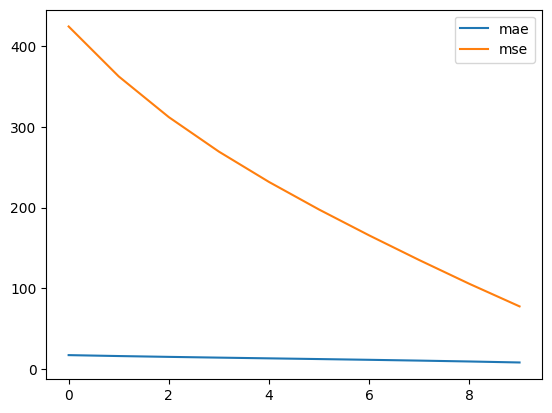

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
result_df = pd.DataFrame(result.history)
plt.plot(result_df["loss"], label = "mae")
plt.plot(result_df["mse"], label = "mse")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(24)

#sequential api

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (1,)),
    tf.keras.layers.Dense(1, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")
])

#model compilation
model.compile(
 optimizer = "sgd",
 loss = "mae",
 metrics =  ["mae"]
)

# model fit
history = model.fit(tf.expand_dims(X, axis = -1), y,
          epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 388ms/step - loss: 11.4489 - mae: 11.4489
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.0283 - mae: 11.0283
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 10.5848 - mae: 10.5848
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 10.1141 - mae: 10.1141
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.6117 - mae: 9.6117


In [ ]:
history.history

{'loss': [11.44891357421875,
  11.028310775756836,
  10.584806442260742,
  10.114113807678223,
  9.611696243286133],
 'mae': [11.44891357421875,
  11.028310775756836,
  10.584806442260742,
  10.114113807678223,
  9.611696243286133]}

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [ ]:
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 495ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [ ]:
model.predict([11])

1/1 [==============================] - 0s 59ms/step


array([[13.850121]], dtype=float32)

In [ ]:
model.predict([8])

1/1 [==============================] - 0s 111ms/step


array([[7.0536537]], dtype=float32)

## Improving a model


1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

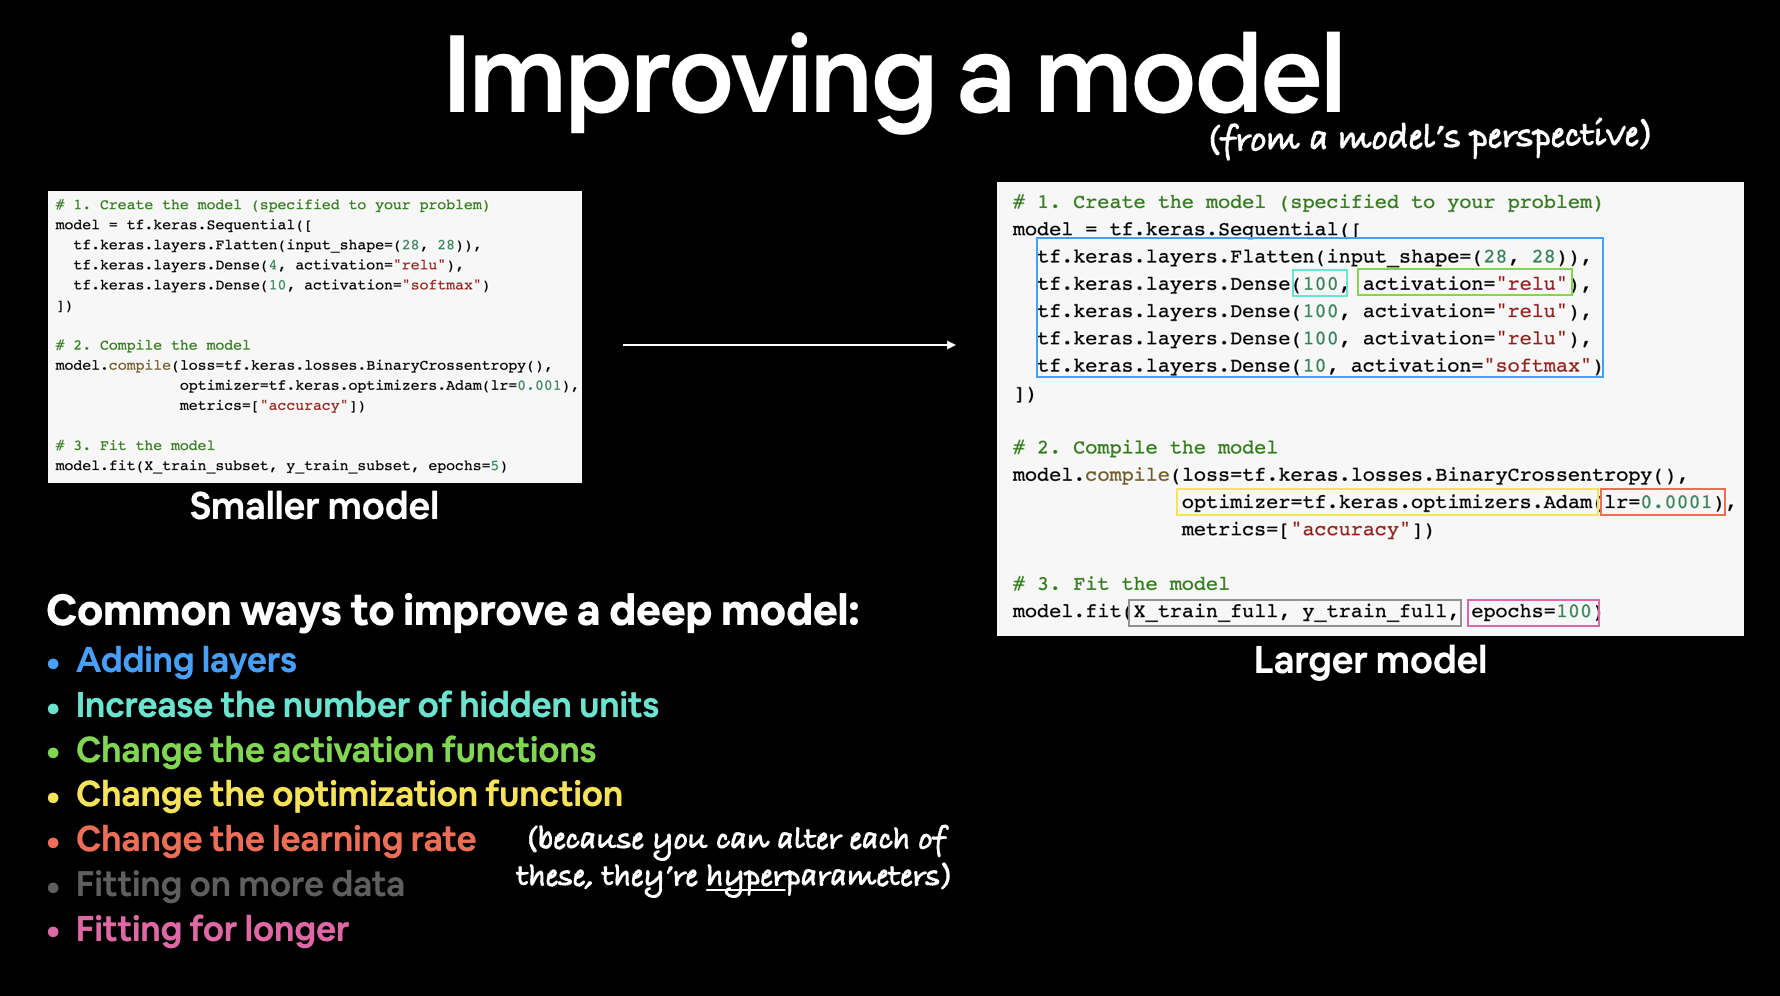

### To improve our previous model we train it for longer time

In [ ]:
import os
import random
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  tf.random.set_seed(seed)
  # When running on the CuDNN backend, two further options must be set
  os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
  os.environ['TF_DETERMINISTIC_OPS'] = '1'
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")


Random seed set as 3


In [ ]:
set_seed(3)

model1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (1,)),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")

])

model1.compile(
    loss = "mae",
    optimizer = "sgd",
     metrics =  ["mse"]
)

result = model1.fit(tf.expand_dims(X, axis = -1), y,
          epochs = 30)


Random seed set as 3
Epoch 1/30
1/1 [==============================] - 1s 521ms/step - loss: 12.8659 - mse: 214.4789
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 12.6479 - mse: 209.3085
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 12.4205 - mse: 203.9785
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 12.1806 - mse: 198.4135
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 12.0296 - mse: 192.5355
Epoch 6/30
1/1 [==============================] - 0s 13ms/step - loss: 11.9081 - mse: 187.9309
Epoch 7/30
1/1 [==============================] - 0s 13ms/step - loss: 11.7728 - mse: 182.8877
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 11.6212 - mse: 177.3388
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 11.4504 - mse: 171.2097
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 11.2567 - mse: 164.4181
Epoch 11/30
1/1 [===========

In [ ]:
model1.predict([-7])

1/1 [==============================] - 0s 71ms/step


array([[5.2924557]], dtype=float32)

In [ ]:
y_pred = model1.predict(tf.expand_dims(X, axis = -1))
y_pred

1/1 [==============================] - 0s 143ms/step


array([[ 5.2924557],
       [ 3.1905437],
       [ 1.0886317],
       [ 4.052268 ],
       [ 9.487042 ],
       [14.921817 ],
       [20.356594 ],
       [25.791368 ]], dtype=float32)

In [ ]:
y_pred.flatten()

array([ 5.2924557,  3.1905437,  1.0886317,  4.052268 ,  9.487042 ,
       14.921817 , 20.356594 , 25.791368 ], dtype=float32)

In [ ]:
y

<tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>

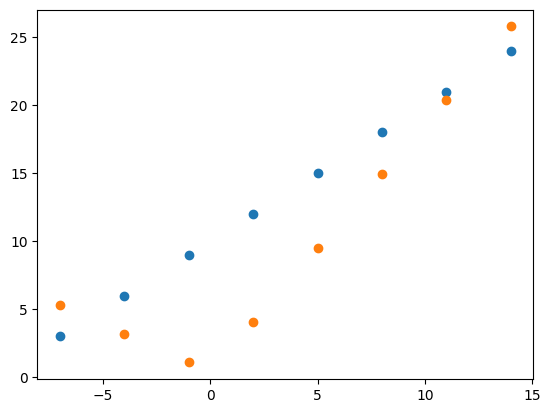

In [ ]:
plt.scatter(x = X, y = y)
plt.scatter(x = X, y = y_pred.flatten())

In [ ]:
model1.predict([25])

1/1 [==============================] - 0s 42ms/step


array([[45.718876]], dtype=float32)

In [ ]:
set_seed(3)


model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (1,)),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")

])

model2.compile(
    loss = "mae",
    optimizer = "sgd",
     metrics =  ["mse"]
)

result = model2.fit(tf.expand_dims(X, axis = -1), y,
          epochs = 40)


Random seed set as 3
Epoch 1/40
1/1 [==============================] - 0s 491ms/step - loss: 14.9819 - mse: 294.2701
Epoch 2/40
1/1 [==============================] - 0s 23ms/step - loss: 14.1296 - mse: 258.9726
Epoch 3/40
1/1 [==============================] - 0s 15ms/step - loss: 13.3098 - mse: 227.4389
Epoch 4/40
1/1 [==============================] - 0s 17ms/step - loss: 12.4936 - mse: 198.3315
Epoch 5/40
1/1 [==============================] - 0s 15ms/step - loss: 11.6558 - mse: 170.7736
Epoch 6/40
1/1 [==============================] - 0s 14ms/step - loss: 10.7748 - mse: 144.2849
Epoch 7/40
1/1 [==============================] - 0s 14ms/step - loss: 9.8213 - mse: 118.4281
Epoch 8/40
1/1 [==============================] - 0s 12ms/step - loss: 8.8522 - mse: 95.4830
Epoch 9/40
1/1 [==============================] - 0s 12ms/step - loss: 7.8039 - mse: 72.6341
Epoch 10/40
1/1 [==============================] - 0s 15ms/step - loss: 6.6471 - mse: 52.0837
Epoch 11/40
1/1 [=================

1/1 [==============================] - 0s 71ms/step


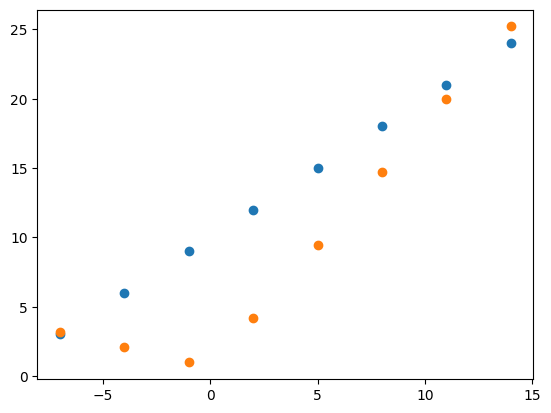

In [ ]:
y_pred_2 = model2.predict(tf.expand_dims(X, axis = -1))

plt.scatter(x = X, y = y)
plt.scatter(x = X, y = y_pred_2.flatten())

In [ ]:
new_y

In [ ]:
set_seed(3)

new_x = tf.constant(np.arange(-50, 50, 3))
new_y = new_x + 10
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (1,)),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(15, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")

])

model2.compile(
    loss = "mae",
    optimizer = "adam",
     metrics =  ["mse"]
)

result = model2.fit(tf.expand_dims(new_x, axis = -1), new_y,
          epochs = 100)

Random seed set as 3
Epoch 1/100
2/2 [==============================] - 2s 12ms/step - loss: 30.1424 - mse: 1320.1641
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 29.6441 - mse: 1277.3330
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.1687 - mse: 1237.4886
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 28.6814 - mse: 1197.6809
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 28.2106 - mse: 1159.8990
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 27.7313 - mse: 1122.2068
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 27.2563 - mse: 1084.5232
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8001 - mse: 1049.2936
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 26.3513 - mse: 1014.8256
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.9107 - mse: 981.1815
Epoch 11/100
2/2 [

1/1 [==============================] - 0s 59ms/step


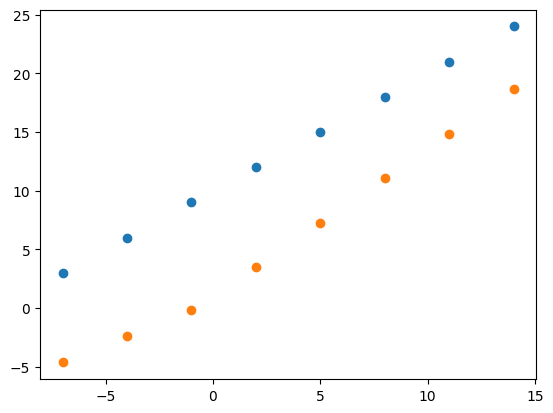

In [ ]:
y_pred_2 = model2.predict(tf.expand_dims(X, axis = -1))

plt.scatter(x = X, y = y)
plt.scatter(x = X, y = y_pred_2.flatten())

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_2.flatten())

-0.211353452917584

In [ ]:
# Set random seed
tf.random.set_seed(24)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 355ms/step - loss: 14.0116 - mae: 14.0116
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8791 - mae: 13.8791
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7466 - mae: 13.7466
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6141 - mae: 13.6141
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4816 - mae: 13.4816
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3491 - mae: 13.3491
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2166 - mae: 13.2166
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0841 - mae: 13.0841
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9516 - mae: 12.9516
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8191 - mae: 12.8191
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 10.0
model.predict([8.0]) # the right answer is 20.0 (y = X + 10)

1/1 [==============================] - 1s 739ms/step


array([[14.553156]], dtype=float32)

## Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize


It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use.

$y=X+10$

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

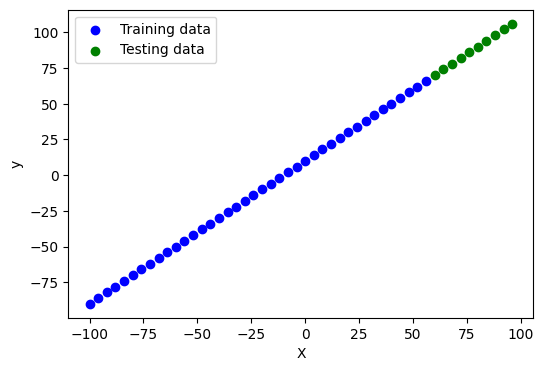

In [ ]:
plt.figure(figsize=(6,4))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Define model

In [ ]:
# Set random seed
tf.random.set_seed(24)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

<Axes: >

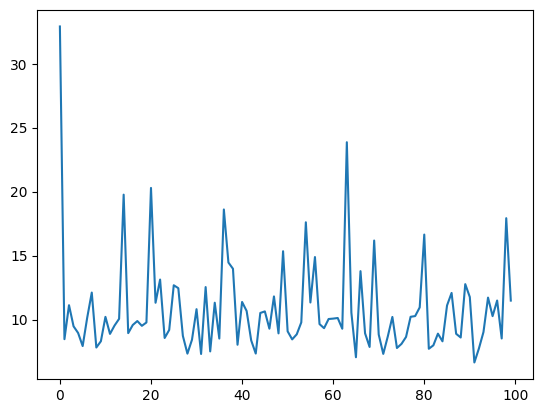

In [ ]:
import pandas as pd
pd.Series(history.history["loss"]).plot()

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Visualizing the predictions

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 82ms/step


In [ ]:
# View the predictions
y_preds

array([[60.370056],
       [64.30385 ],
       [68.23764 ],
       [72.17144 ],
       [76.10523 ],
       [80.03903 ],
       [83.972824],
       [87.906624],
       [91.840416],
       [95.77421 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")
  plt.show()

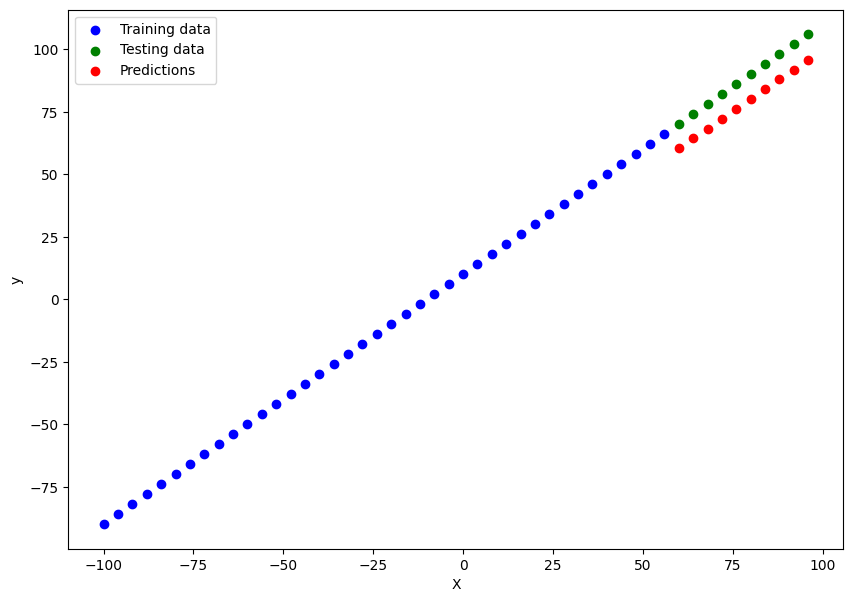

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [ ]:
# Check the test label tensor values
y_test.shape

(10,)

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds.shape

(10, 1)

In [ ]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=98.59872>

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model

1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.


Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)

In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 45ms/step


array([[ 74.607796],
       [ 79.49557 ],
       [ 84.38334 ],
       [ 89.27111 ],
       [ 94.158875],
       [ 99.046646],
       [103.93442 ],
       [108.82218 ],
       [113.70995 ],
       [118.597725]], dtype=float32)

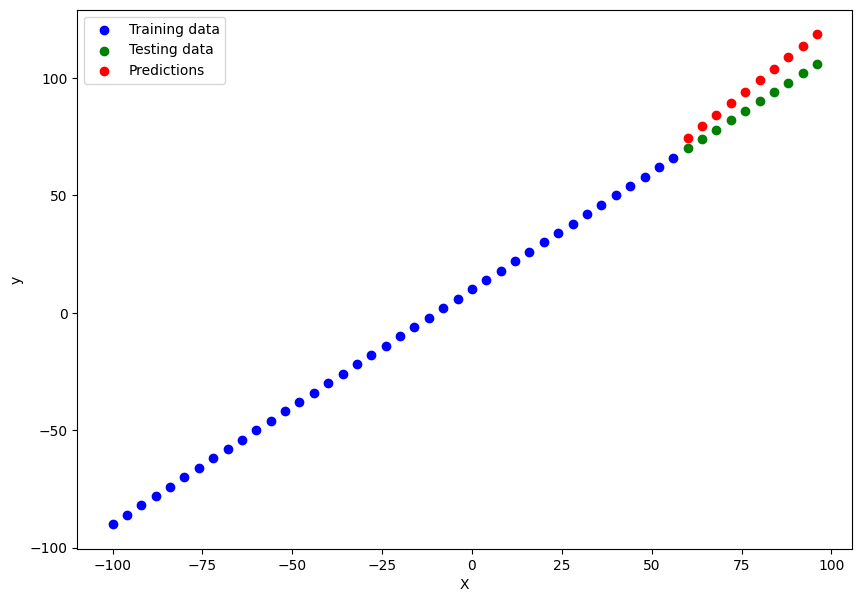

In [ ]:
plot_predictions(predictions = y_pred_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
mae_1, mse_1

(8.602761, 80.509605)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD())
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 42.0450
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.0296
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 15.1912
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 15.2944
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.8753
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8372
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1692
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0931
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4086
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8073
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2496
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 25.3073
Epoch 13/100
2/2 [==============================

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

In [ ]:
X_train

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])

In [ ]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

1/1 [==============================] - 0s 51ms/step


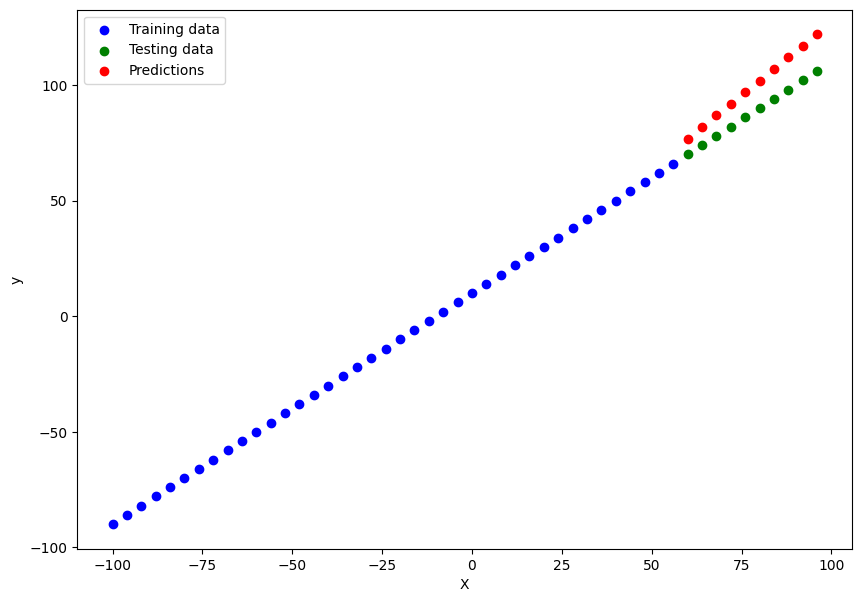

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(11.441651, 139.37564)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 54ms/step


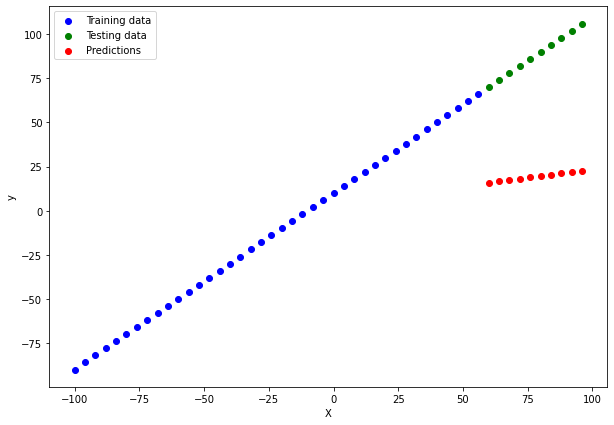

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

## Comparing results of models

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,4804.469238


## Saving a model

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

## Loading a model

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_saved_model.predict([99])

1/1 [==============================] - 0s 78ms/step


array([[125.759384]], dtype=float32)

## Exercise

train a neural network on this dataset and try to reduce mae

Dataset - https://www.kaggle.com/datasets/bumba5341/advertisingcsv